# KMeans Algorithm

We have seen how we can use the pre-built algorithm, but we want to truly understand what is happening and so for that we are going to build our own basic version! Now first the broad overview of how it works.... for each step we will give more explanation as we get to that part in the code, but overall, you can do KMeans the following way.

1. Initialize: Start with n initial centroids, these can be created in numerous different ways, but for our basic example we will pick random colors.

2. Assign: For each data point, find the closest centroid, generally speaking by using basic euclidean distance (although that does not mean you can't substitute in a different metric).

3. Update: For each group present in the data, go through and update the centroid to be the mean of cluster points. You will need to save the old labels prior to running this.

4. Check: Check if you have either done a specified number of maximum iterations or if the labels did not change from their old labels by comparing the two. If either of these conditions are true then stop the algorithm, otherwise go back to step 2.

## Step 1: Initialize

In the first code block, read in the picture again that we will be using. In the second one, we are picking 4 colors (each has 3 values one for each of Red/Green/Blue) from a random uniform distribution between 0 and 1. We will also show the palette of colors we start with.

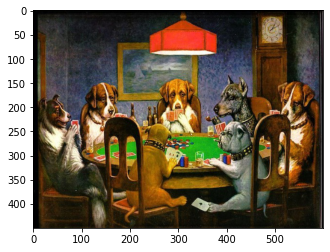

In [1]:
import matplotlib.pyplot as plt

#Read in the image
img = plt.imread('Dogs.jpg')
img = img / 255
plt.imshow(img, vmin=0,
    vmax=1)
plt.show()

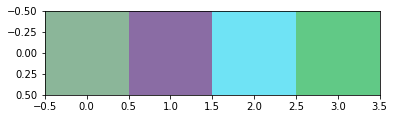

In [2]:
import numpy as np

#Set the seed to make it easy to replicate
np.random.seed(0)

#Randomly choose 4 colors
colors = np.random.uniform(0,1,(4,3))

#Show the ten colors
plt.imshow([colors])
plt.show()

As we did prior, we are going to reshape the array so that we can use the algorithm.

In [3]:
#Hold onto the old shape
img_shape = img.shape

#Reshape the img
X = img.reshape(img_shape[0]*img_shape[1], img_shape[2])
print(X)

[[0.00392157 0.00392157 0.        ]
 [0.00392157 0.00392157 0.        ]
 [0.         0.         0.        ]
 ...
 [0.33333333 0.31764706 0.30588235]
 [0.00784314 0.00392157 0.        ]
 [0.01176471 0.01176471 0.00392157]]


## Step 2: Assign

This part can be hard to understand if you aren't as skilled with mathematical notations so we are going to take it very slowly! To start with, we are going to have to go through each pixel and assign a group, so pull the first pixel in our image that we will be working with. I will use a random number I chose for this example.

[0.34901961 0.37647059 0.49019608]


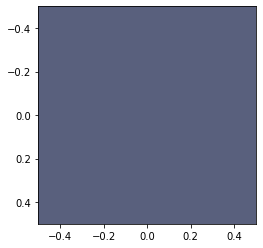

In [4]:
#Grab the pixel
pixel = X[85000]
print(pixel)

#Plot the pixel color (we need to nest it twice for this to work with just a 1D array)
plt.imshow([[pixel]])
plt.show()

For this pixel, we have to find the distance from each centroid that we currently have. Let's grab the first color that we want to compare with.

[0.5488135  0.71518937 0.60276338]


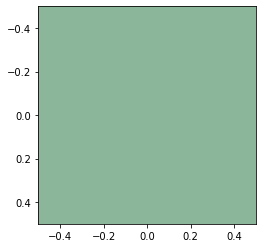

In [5]:
#Grab the centroid color
c = colors[0]
print(c)

#Plot the centroid color (we need to nest it twice for this to work with just a 1D array)
plt.imshow([[c]])
plt.show()

### Euclidean Distance

The euclidean distance between two points p and q is defined as:

$$d(p, q) = \sqrt{\sum_{i=1}^{n}(q_i-p_i)^2}$$

where

$d = \text{Euclidean distance} $

$p = \text{Point 1} $

$q = \text{Point 2} $

$i = \text{Component i of a point} $

$n = \text{Number of components in the points} $

Let's work through piece by piece how to quickly compute the euclidean distance between these two points. First to find the term $q_i-p_i$, we can do the following.

In [6]:
#Finding euclidean distance piece by piece...
print(pixel-c)

[-0.1997939  -0.33871878 -0.1125673 ]


Now to move on to $(q_i-p_i)^2$

In [7]:
#Finding euclidean distance piece by piece...
print((pixel-c) ** 2)

[0.0399176  0.11473041 0.0126714 ]


We need to sum the values which can easily be with the sum function, which will get us to the point of $\sum_{i=1}^{n}(q_i-p_i)^2$

In [8]:
#Finding euclidean distance piece by piece...
print(((pixel-c) ** 2).sum())

0.16731940807323972


And finally, we need to take the square root of that to get to our final answer for the distance.

In [9]:
#Finding euclidean distance piece by piece...
print(((pixel-c) ** 2).sum() ** .5)

0.40904695093991317


Now the distance needs to be computed for all colors to find the lowest distance of the bunch. Let's loop thorugh each and see what the distances are below.

Pixel to assign:
[0.34901961 0.37647059 0.49019608]


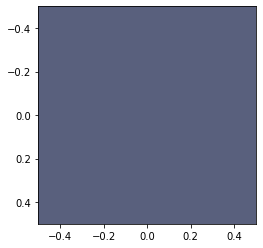

--------

Centroid:
[0.5488135  0.71518937 0.60276338]


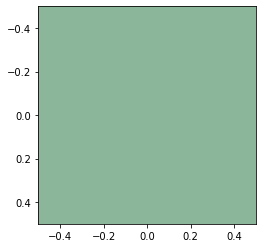

Distance: 0.40904695093991317
--------

Centroid:
[0.54488318 0.4236548  0.64589411]


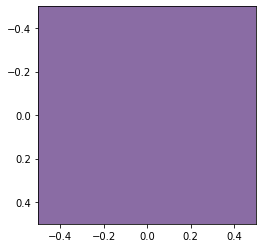

Distance: 0.25461886779807286
--------

Centroid:
[0.43758721 0.891773   0.96366276]


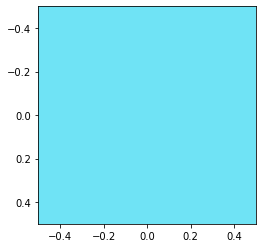

Distance: 0.7053733024307559
--------

Centroid:
[0.38344152 0.79172504 0.52889492]


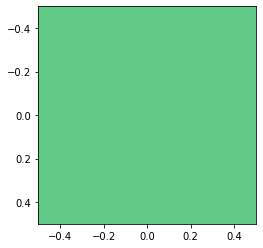

Distance: 0.41847189438882065
--------



In [10]:
#Plot the pixel color (we need to nest it twice for this to work with just a 1D array)
print("Pixel to assign:")
print(pixel)
plt.imshow([[pixel]])
plt.show()
print("--------")
print()

for c in colors:
    #Plot the centroid
    print("Centroid:")
    print(c)
    plt.imshow([[c]])
    plt.show()
    
    #Find the distance
    distance = ((pixel-c) ** 2).sum() ** .5
    print("Distance: {}".format(distance))
    
    print("--------")
    print()

As we can tell, that blue color is the closest in terms of color. Now to generalize this so that it can run fast, I want to build out a function which will assign the centroid. Once again we will work through first how to compute the distances without needing a for loop (numpy is much faster than using a for loop).

In [11]:
#Step by step finding the distance

print("Step 1 - Find difference")
distance = pixel - colors
print(distance)
print()
print("Step 2 - Square Values")
distance = distance ** 2
print(distance)
print()
print("Step 3 - Get the sum by summing across axis 1")
distance = distance.sum(axis=1)
print(distance)
print()
print("Step 4 - Take the square root")
distance = distance ** .5
print(distance)
print()

Step 1 - Find difference
[[-0.1997939  -0.33871878 -0.1125673 ]
 [-0.19586358 -0.04718421 -0.15569803]
 [-0.0885676  -0.51530241 -0.47346668]
 [-0.03442191 -0.41525445 -0.03869884]]

Step 2 - Square Values
[[0.0399176  0.11473041 0.0126714 ]
 [0.03836254 0.00222635 0.02424188]
 [0.00784422 0.26553658 0.2241707 ]
 [0.00118487 0.17243626 0.0014976 ]]

Step 3 - Get the sum by summing across axis 1
[0.16731941 0.06483077 0.4975515  0.17511873]

Step 4 - Take the square root
[0.40904695 0.25461887 0.7053733  0.41847189]



Combining all these steps we have the following.

In [12]:
#Find the distance to each centroid
distance = ((pixel - colors) ** 2).sum(axis=1) ** .5
print(distance)

[0.40904695 0.25461887 0.7053733  0.41847189]


The argmin function will return the index of the smallest distance in the array.

In [13]:
#Find the smallest distance
i = distance.argmin()
print(i)

1


Now we are going to make a minor change up. Instead of going pixel by pixel, we are going to go color by color. The following code is an example of how we can get the distance for every point from the first centroid.

In [14]:
#Find each points distance from the first centroid
c = colors[0]
print(((X - c) ** 2).sum(axis=1) ** .5)

[1.07987628 1.07987628 1.08444261 ... 0.54093431 1.07790283 1.06856875]


Using list comprehension, create a list of 4 arrays where each array holds the distance for each point from the corresponding centroid.

In [15]:
#Get the distance
distance = [((X - c) ** 2).sum(axis=1) ** .5 for c in colors]
print(distance)

[array([1.07987628, 1.07987628, 1.08444261, ..., 0.54093431, 1.07790283,
       1.06856875]), array([0.94127289, 0.94127289, 0.94528317, ..., 0.41424507, 0.9390246 ,
       0.93058987]), array([1.38021447, 1.38021447, 1.38397528, ..., 0.87929775, 1.37898733,
       1.36997904]), array([1.02195868, 1.02195868, 1.02644326, ..., 0.52630349, 1.02050884,
       1.01097913])]


Using the vstack function from numpy will stack it so that each columns holds the distance from each centroid for each point.

In [16]:
#Stack the distances
distance = np.vstack(distance)
print(distance)

[[1.07987628 1.07987628 1.08444261 ... 0.54093431 1.07790283 1.06856875]
 [0.94127289 0.94127289 0.94528317 ... 0.41424507 0.9390246  0.93058987]
 [1.38021447 1.38021447 1.38397528 ... 0.87929775 1.37898733 1.36997904]
 [1.02195868 1.02195868 1.02644326 ... 0.52630349 1.02050884 1.01097913]]


Finally, use argmin along the columns to grab the labels!

In [17]:
#Find the labels
labels = distance.argmin(axis=0)
print(labels)

[1 1 1 ... 1 1 1]


Like we did before, you can index with the labels to find the image created from this before the next step. 

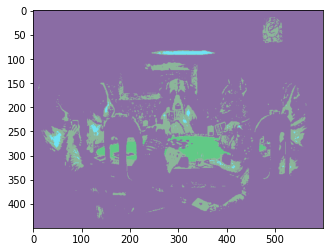

In [18]:
#Show the image
Y = colors[labels]
Y = Y.reshape(img_shape)
plt.imshow(Y)
plt.show()

If you wanted to see the number of pixels with each label, you can call np.unique with the labels and return_count=True. It will give you back unique labels and the count for each.

In [19]:
#Find the unique label counts
print(np.unique(labels, return_counts=True))

(array([0, 1, 2, 3]), array([ 25058, 238195,   1747,   5000]))


## Step 3: Update

For the updating part, we need to go through each label and find what the average value is. To do so we want to first remember how boolean indexing can work. For example, to find all points which have label equal to 0, we can get the following index then use it to find the mean of those points only.

In [20]:
#Create the boolean index
print(labels == 0)

[False False False ... False False False]


In [21]:
#Index the data points by it
print(X[labels == 0])
print()
print("Length:")
print(len(X[labels == 0]))

[[0.64313725 0.54901961 0.30588235]
 [0.60784314 0.5254902  0.27058824]
 [0.6        0.5254902  0.26666667]
 ...
 [0.62352941 0.55686275 0.45490196]
 [0.64705882 0.56862745 0.47058824]
 [0.63921569 0.55686275 0.45098039]]

Length:
25058


Find the mean value across the columns.

In [22]:
#Find the centroid value
centroid = X[labels == 0].mean(axis=0)
print(centroid)

[0.79287097 0.69422939 0.48943596]


Not that we know how to grab the centroids, let's write some code to get all the centroids.

[[0.79287097 0.69422939 0.48943596]
 [0.27641159 0.20766316 0.13659489]
 [0.9844327  0.97568717 0.9032156 ]
 [0.18885725 0.64749569 0.11264157]]



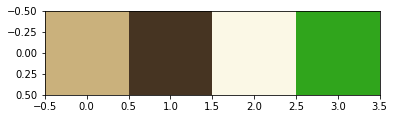

In [23]:
#Find the new colors
colors = [X[labels == l].mean(axis=0) for l in list(range(len(colors)))]
colors = np.vstack(colors)
print(colors)
print()

#Plot the new colors
plt.imshow([colors])
plt.show()

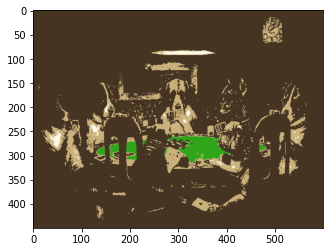

In [24]:
#Plot the image with the newly assigned colors
Y = colors[labels]
Y = Y.reshape(img_shape)
plt.imshow(Y)
plt.show()

## Step 4: Check

Now that we are done with the first three steps, let's begin from the top. I am going to define some of the work from prior as functions to make this easier.

In [25]:
def assign_labels(X, colors):
    #Get the distance
    distance = [((X - c) ** 2).sum(axis=1) ** .5 for c in colors]

    #Stack the distances
    distance = np.vstack(distance)

    #Find the labels
    labels = distance.argmin(axis=0)
    
    return labels

def compute_centroids(X, colors, labels):
    #Find the centers
    colors = [X[labels == l].mean(axis=0) for l in list(range(len(colors)))]
    
    #Stack
    colors = np.vstack(colors)
    
    return colors

def plot_clusters(colors, labels, img_shape):
    #Plot the clusters
    Y = colors[labels]
    Y = Y.reshape(img_shape)
    plt.imshow(Y)
    plt.show()

We will choose a different seed this time.

In [26]:
#Set the seed to make it easy to replicate
np.random.seed(1)

#Randomly choose 4 colors
colors = np.random.uniform(0,1,(4,3))

Let's do a first iteration.

Image after labeling:


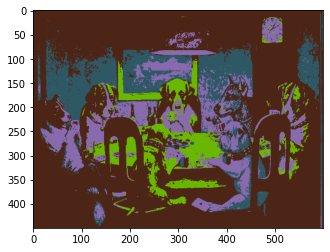


Image after re-computing centroids:


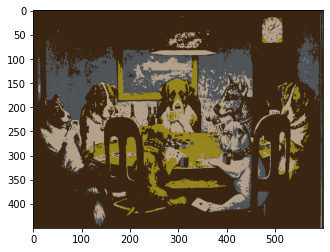

In [27]:
print("Image after labeling:")
labels = assign_labels(X, colors)
plot_clusters(colors, labels, img_shape)
print()
colors = compute_centroids(X, colors, labels)
print("Image after re-computing centroids:")
plot_clusters(colors, labels, img_shape)

And a second iteration.

Image after labeling:


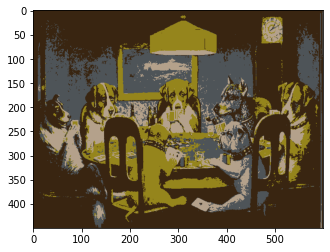


Image after re-computing centroids:


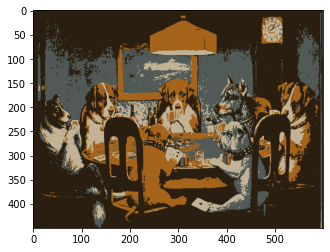

In [28]:
print("Image after labeling:")
labels = assign_labels(X, colors)
plot_clusters(colors, labels, img_shape)
print()
colors = compute_centroids(X, colors, labels)
print("Image after re-computing centroids:")
plot_clusters(colors, labels, img_shape)

One more time before we introduce the loop.

Image after labeling:


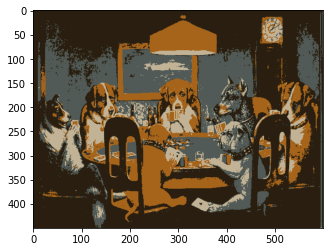


Image after re-computing centroids:


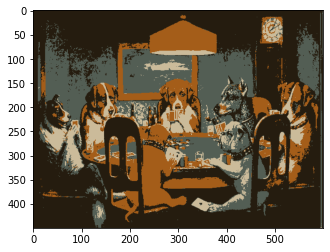

In [29]:
print("Image after labeling:")
labels = assign_labels(X, colors)
plot_clusters(colors, labels, img_shape)
print()
colors = compute_centroids(X, colors, labels)
print("Image after re-computing centroids:")
plot_clusters(colors, labels, img_shape)

Now for our loop, we are going to set a maximum number of iterations and also check if the centroids have stopped moving. If either condition is true we stop!

Image after labeling:


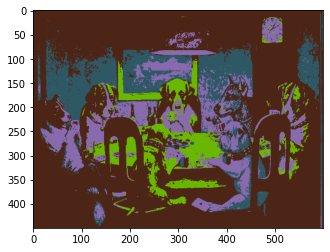


Image after re-computing centroids:


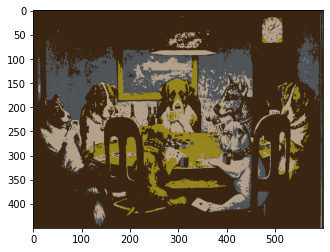

270000 Labels Changed
Image after labeling:


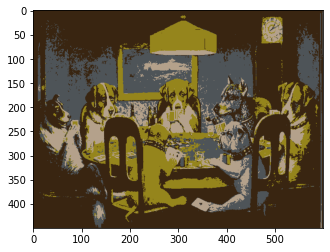


Image after re-computing centroids:


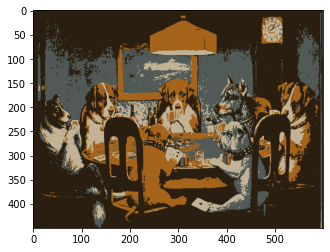

39897 Labels Changed
Image after labeling:


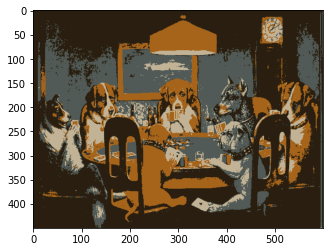


Image after re-computing centroids:


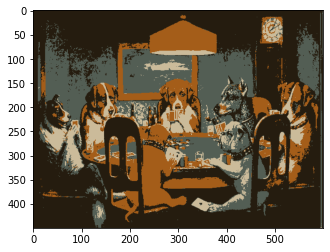

14429 Labels Changed
Image after labeling:


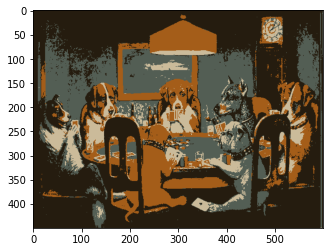


Image after re-computing centroids:


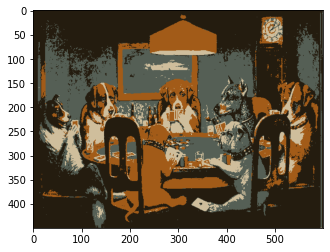

4336 Labels Changed
Image after labeling:


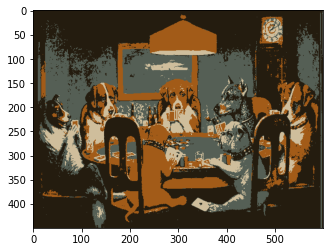


Image after re-computing centroids:


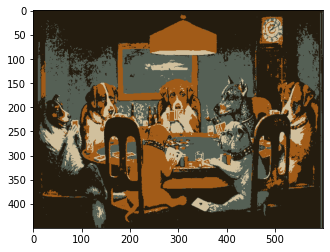

1916 Labels Changed


In [30]:
#Set the seed to make it easy to replicate
np.random.seed(1)

#Randomly choose 4 colors
colors = np.random.uniform(0,1,(4,3))

max_iter = 5

#Start with labels as -1 meaning null
labels = np.ones(len(X)) * -1

for _ in range(max_iter):
    #Hold onto the old labels
    old_labels = labels.copy()
    
    print("Image after labeling:")
    labels = assign_labels(X, colors)
    plot_clusters(colors, labels, img_shape)
    print()
    
    
    
    colors = compute_centroids(X, colors, labels)
    print("Image after re-computing centroids:")
    plot_clusters(colors, labels, img_shape)
    
    #If all labels are the same, end the iteration
    if (labels == old_labels).all():
        break
    else:
        print("{} Labels Changed".format((labels != old_labels).sum()))

With a cutoff of 5 iterations, we notice that there is still some labels which are being changed. We might want to increase the number of labels in the future because of that. Let's also try this with 10 colors.

Image after labeling:


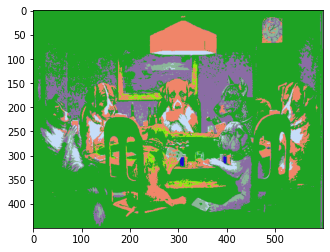


Image after re-computing centroids:


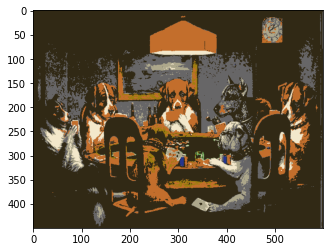

270000 Labels Changed
Image after labeling:


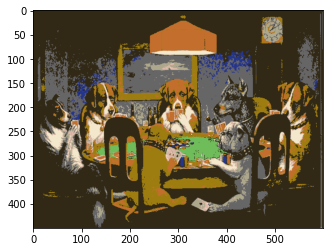


Image after re-computing centroids:


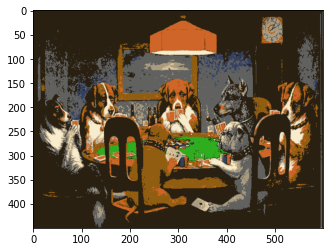

48302 Labels Changed
Image after labeling:


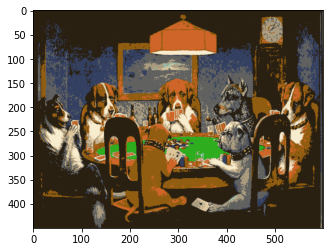


Image after re-computing centroids:


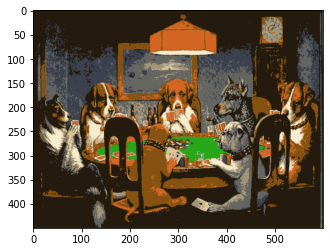

37598 Labels Changed
Image after labeling:


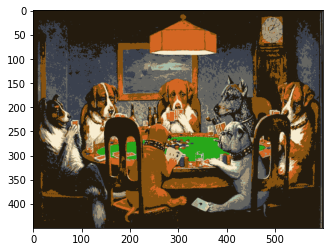


Image after re-computing centroids:


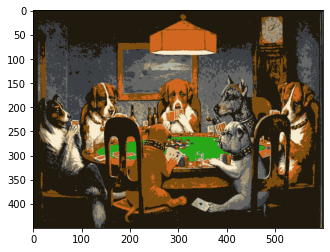

22638 Labels Changed
Image after labeling:


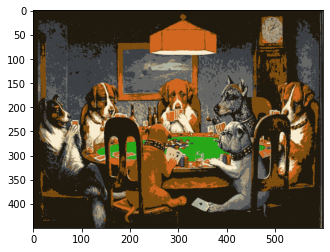


Image after re-computing centroids:


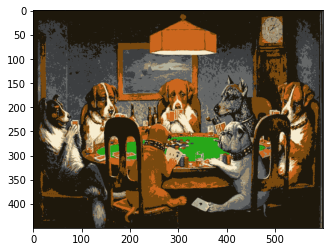

12969 Labels Changed


In [31]:
#Set the seed to make it easy to replicate
np.random.seed(0)

#Randomly choose 4 colors
colors = np.random.uniform(0,1,(10,3))

max_iter = 5

#Start with labels as -1 meaning null
labels = np.ones(len(X)) * -1

for _ in range(max_iter):
    #Hold onto the old labels
    old_labels = labels.copy()
    
    print("Image after labeling:")
    labels = assign_labels(X, colors)
    plot_clusters(colors, labels, img_shape)
    print()
    
    
    
    colors = compute_centroids(X, colors, labels)
    print("Image after re-computing centroids:")
    plot_clusters(colors, labels, img_shape)
    
    #If all labels are the same, end the iteration
    if (labels == old_labels).all():
        break
    else:
        print("{} Labels Changed".format((labels != old_labels).sum()))

If we get rid of all the plotting, and run this for up to 1000 times for 5 colors, we can see how long it takes to converge as well as the final picture.

Converged after 63 iterations.


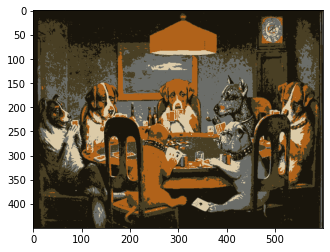

In [32]:
#Set the seed to make it easy to replicate
np.random.seed(0)

#Randomly choose 10 colors
colors = np.random.uniform(0,1,(5,3))

max_iter = 1000

#Start with labels as -1 meaning null
labels = np.ones(len(X)) * -1

num_iter = 0
for _ in range(max_iter):
    num_iter += 1
    #Hold onto the old labels
    old_labels = labels.copy()
    
    labels = assign_labels(X, colors)
    colors = compute_centroids(X, colors, labels)
    
    #If all labels are the same, end the iteration

    if (labels == old_labels).all():
        break

print("Converged after {} iterations.".format(num_iter))
plot_clusters(colors, labels, img_shape)